# Assignment 7: Binary Classification Methods
Choosen Dataset:

**Binary Classification**

[Cancer Detection Dataset]([http://mlearn.ics.uci.edu/MLRepository.html])

The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics.

### Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian


### About The Dataset 

<div dir=ltr style="direction: ltr;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<center>

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

</center>
</font>
</div>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [2]:
path = './cell_samples.csv'
df = pd.read_csv(path)

Now let's take a look at the first 5 rows of the data:

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


```df.info()``` 

This methods give us data about our dataset.

It shows that we have no NaN value.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Check Null values (We don't have any null values)

In [6]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

**Check for duplicate values**

we have duplicate value so we must drop it

In [7]:
df[df.duplicated]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [8]:
df = df.drop_duplicates()

In [9]:
df[df.duplicated]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           691 non-null    int64 
 1   Clump        691 non-null    int64 
 2   UnifSize     691 non-null    int64 
 3   UnifShape    691 non-null    int64 
 4   MargAdh      691 non-null    int64 
 5   SingEpiSize  691 non-null    int64 
 6   BareNuc      691 non-null    object
 7   BlandChrom   691 non-null    int64 
 8   NormNucl     691 non-null    int64 
 9   Mit          691 non-null    int64 
 10  Class        691 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.8+ KB


**Check for Outliers**

Outliers are data points that deviate significantly from the rest of the data in a dataset. They are observations that lie an abnormal distance from other values in a random sample from a population. In other words, outliers are data points that are unusually far from the central tendency of a distribution.

In [11]:
import plotly.express as px

for col in df.columns:
    fig = px.box(df, y=col)
    fig.update_traces(marker_color='#FF851B')
    fig.update_layout(autosize=False, width=600, height=500, title='Detected Outliers')
    fig.show()


We check the outliers and know that dont have any outliers

Some of boxplot show a little outlier but it's not outlier its related to things that rarely happen in medical science

**Check for Invalid data**

In ```BareNuc``` the data type is deffrent , we need to check it.

In [13]:
df.BareNuc.value_counts()

BareNuc
1     397
10    130
2      30
5      30
3      28
8      20
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

Yes , we have a column with ```?``` value , so need to fix it.

In [15]:
df.BareNuc.replace('?',np.nan,inplace=True)
df.BareNuc.value_counts()

BareNuc
1     397
10    130
2      30
5      30
3      28
8      20
4      19
9       9
7       8
6       4
Name: count, dtype: int64

Now we will fill ```Null``` value of this column with ```mode```

In [16]:
df['BareNuc'].fillna(df['BareNuc'].mode()[0], inplace=True)
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

We don't need the ID column , so drop it.

In [18]:
df.drop(columns=['ID'],inplace=True)

**Correlation** 

 correlation matrix is a useful tool for figuring out how different variables are related to each other. By looking at the correlation coefficients between two variables, we can learn how they are related and how changes in one variable may affect the other variables

In [19]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
Clump,1.000000,0.643340,0.653752,0.487949,0.517448,0.590841,0.561076,0.535712,0.350354,0.716938
UnifSize,0.643340,1.000000,0.905420,0.713117,0.747111,0.684791,0.759525,0.727239,0.460064,0.817720
UnifShape,0.653752,0.905420,1.000000,0.690989,0.714393,0.704382,0.738455,0.724693,0.440592,0.817693
MargAdh,0.487949,0.713117,0.690989,1.000000,0.608477,0.672719,0.669813,0.602453,0.417167,0.701371
SingEpiSize,0.517448,0.747111,0.714393,0.608477,1.000000,0.580709,0.620518,0.634058,0.482644,0.681233
BareNuc,0.590841,0.684791,0.704382,0.672719,0.580709,1.000000,0.672687,0.578417,0.343020,0.816787
BlandChrom,0.561076,0.759525,0.738455,0.669813,0.620518,0.672687,1.000000,0.669059,0.343821,0.756618
NormNucl,0.535712,0.727239,0.724693,0.602453,0.634058,0.578417,0.669059,1.000000,0.427644,0.715540
Mit,0.350354,0.460064,0.440592,0.417167,0.482644,0.343020,0.343821,0.427644,1.000000,0.424111
Class,0.716938,0.817720,0.817693,0.701371,0.681233,0.816787,0.756618,0.715540,0.424111,1.000000


##### Some Insights from Our Data

Countplot for each column.

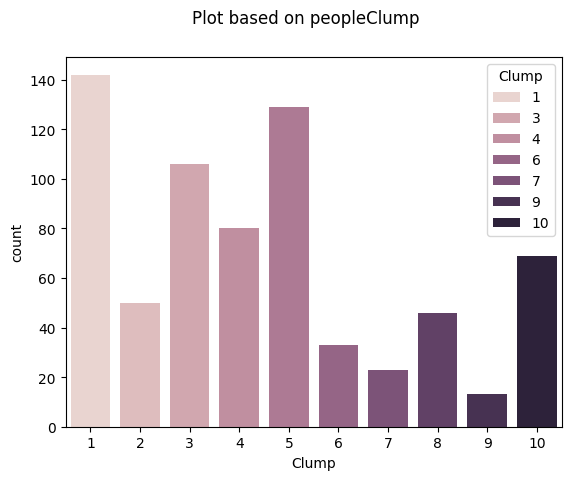

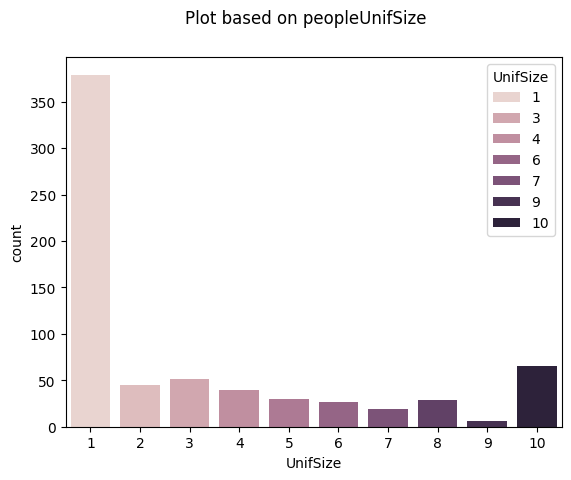

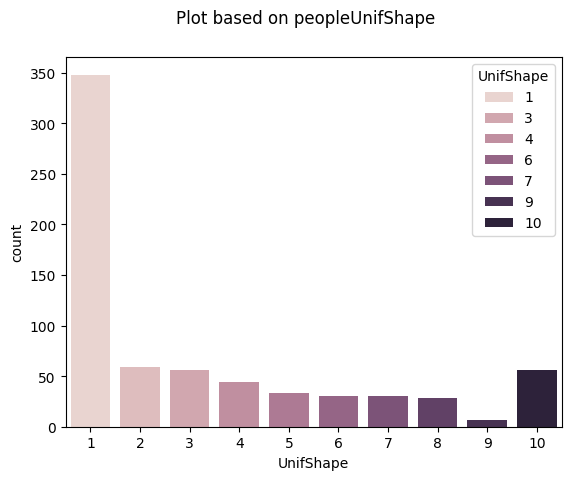

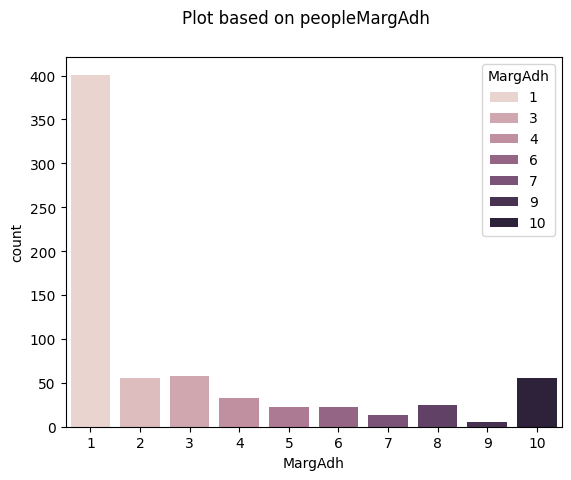

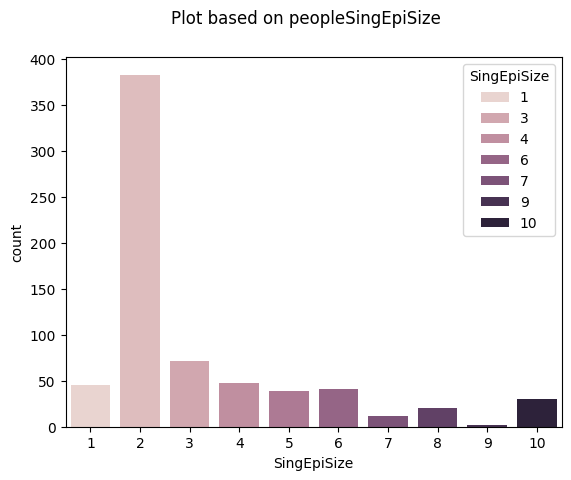

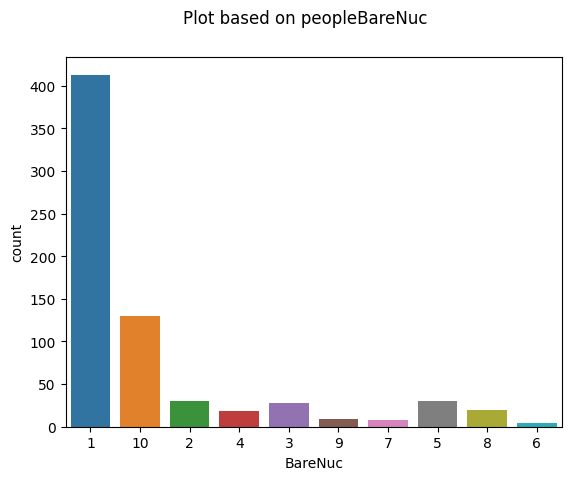

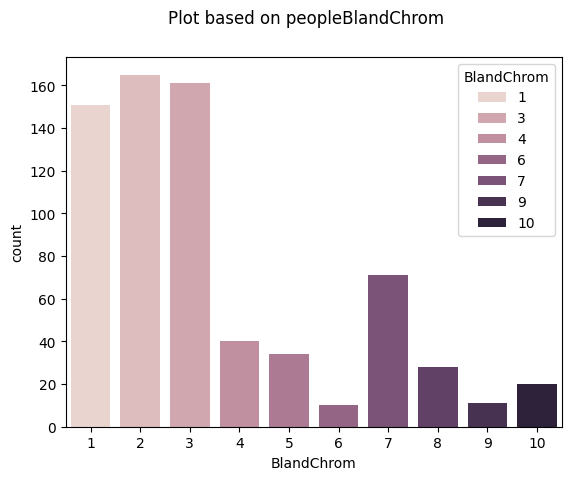

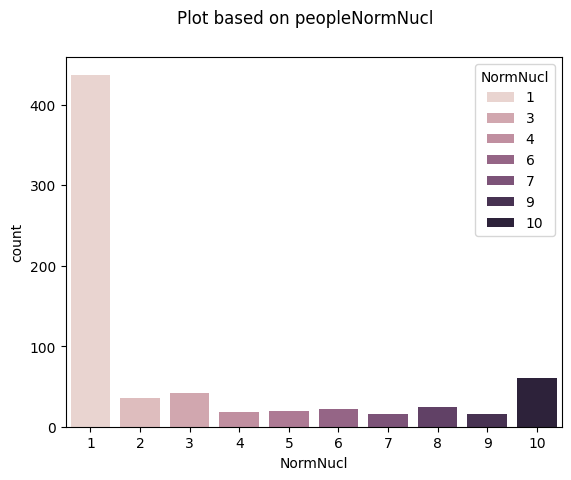

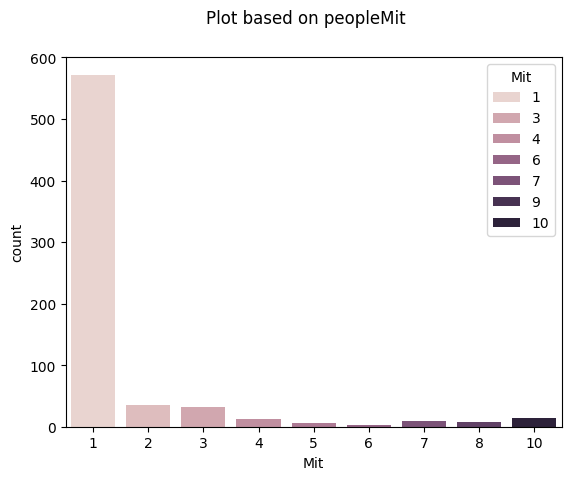

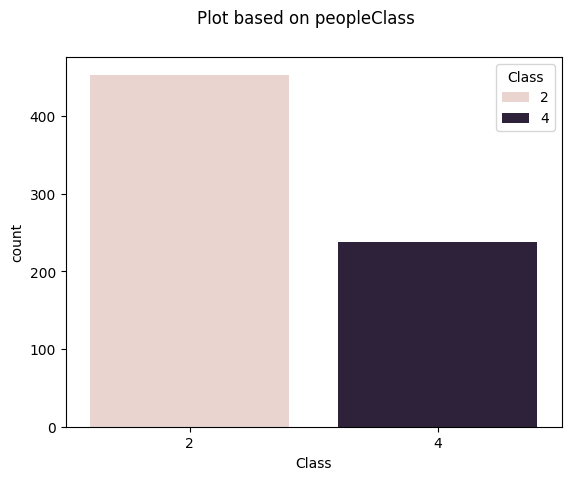

In [23]:
for column in df.columns:
    sns.countplot(data=df, x=column, hue=column)
    plt.suptitle('Plot based on people' + column)
    plt.show();

**Split data (Train & Test) & Feature Scaling**

Feature scaling is an important preprocessing step in machine learning, especially for algorithms that are sensitive to the scale of the input features. The goal is to bring all the features to a similar scale so that no single feature dominates others. This is crucial for algorithms like k-nearest neighbors, support vector machines, and gradient descent-based optimization methods.

In [24]:
#Function for split data beetwen Train and Split
from sklearn.model_selection import train_test_split

Assuming ```output``` is the column representing the likelihood of a heart attack

In [25]:
X = df.drop('Class', axis=1)
y = df['Class']

Split the data into training and testing sets

80 % for train

20% for test

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

**Normalization/Stadardization**

Standard scaling, also known as Z-score normalization, is a method used to scale and center the features of a dataset. The goal of standard scaling is to transform the data in such a way that it has a mean (average) of 0 and a standard deviation of 1. This is achieved by subtracting the mean of each feature from the data and then dividing by the standard deviation.

\begin{align}
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
\end{align}

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [29]:
x_test = scaler.transform(x_test)

## Logistic Regression

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not

**import libraries for ML algorithms**

In [30]:
#ML model
from sklearn.linear_model import LogisticRegression

**Initialize the model**

max_iter : Maximum number of iterations taken for the solvers to converge.

In [31]:
model = LogisticRegression(max_iter=2000, random_state=27)

**Train the model**

In [32]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=2000, random_state=27)

**Make predictions on the test set**

In [33]:
y_pred = model.predict(x_test)

<b>Confusion Matrix:</b>

A confusion matrix provides a tabular summary of the number of true positives, true negatives, false positives, and false negatives.

<hr>

<b>Precision:</b>

Precision measures the proportion of true positives (correctly predicted positives) out of all predicted positives.

Precision is the ratio of true positives to the sum of true positives and false positives. It answers the question: "Of all the positive predictions made by the model, how many were actually correct?"

Precision is important when minimizing false positives is crucial. For example, in medical diagnoses, a high precision means a low rate of misdiagnoses.

Formula: 

\begin{align}
Precision = \frac{TP}{TP+FP}
\end{align}

<b>Recall (Sensitivity, True Positive Rate):</b>

Recall measures the proportion of true positives out of all actual positives.

Recall, also known as sensitivity or true positive rate, is the ratio of true positives to the sum of true positives and false negatives. It answers the question: "Of all the actual positive instances, how many were correctly predicted by the model?"

Recall is important when minimizing false negatives is crucial. For instance, in spam detection, a high recall means a low rate of missing actual spam emails.

Formula: 

\begin{align}
Recall = \frac{TP}{TP+FN}
\end{align}

<b>F1-Score:</b>

The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The harmonic mean gives more weight to lower values, making the F1-Score sensitive to both false positives and false negatives.

The F1-Score is useful when you want to find a balance between precision and recall, and you don't want to favor one over the other.

Formula:

\begin{align}
F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}
\end{align}

<hr>

**Our F1-score is above 0.75**

              precision    recall  f1-score   support

           2       0.99      0.96      0.97        92
           4       0.92      0.98      0.95        47

    accuracy                           0.96       139
   macro avg       0.95      0.97      0.96       139
weighted avg       0.97      0.96      0.96       139



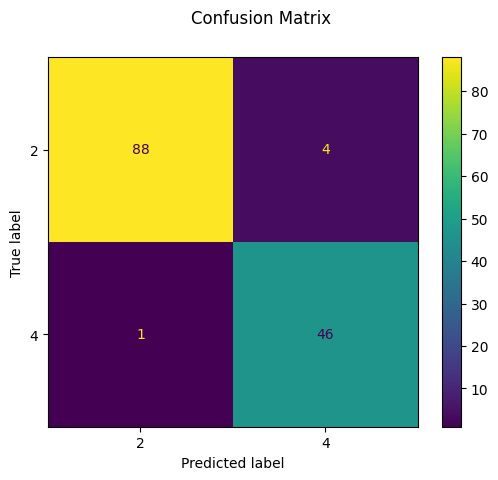

In [34]:
from sklearn import metrics

#predict the model
predicted = model.predict(x_test)

#Classification report
print(metrics.classification_report(y_test, predicted))

#ploting
confussion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

<hr>

## SVM (Support Vector Machine)

Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks. SVMs can be used for a variety of tasks, such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection. SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and nonlinear relationships.

In [35]:
#Import svm model
from sklearn import svm 

#Create a svm Classifier
model = svm.SVC(kernel='linear', random_state=27) # Linear Kernel

#Train the model using the training sets
model.fit(x_train, y_train)

#Predict the response for test dataset
predicted = model.predict(x_test)

**Our F1-score is above 0.8**

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        92
           4       0.92      1.00      0.96        47

    accuracy                           0.97       139
   macro avg       0.96      0.98      0.97       139
weighted avg       0.97      0.97      0.97       139



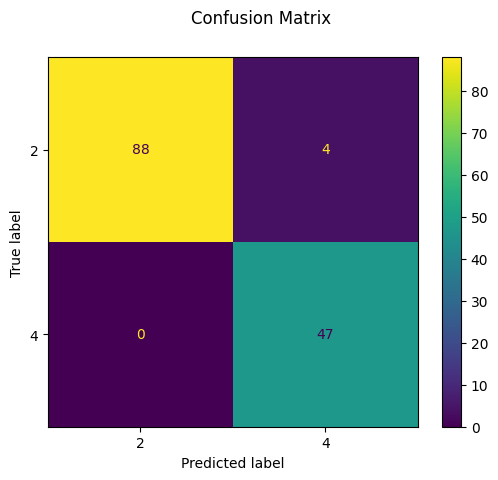

In [36]:
#Classification report
print(metrics.classification_report(y_test, predicted))

#ploting
confussion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Kernle-SVM**

The same module can perfrom kernel SVM as well. All we need to do is to specify the kernel we would like to use.



In [37]:
#Create a svm Classifier
model = svm.SVC(C=1,kernel='poly',degree=2,max_iter=5000, random_state=27)

#Train the model using the training sets
model.fit(x_train, y_train)

SVC(C=1, degree=2, kernel='poly', max_iter=5000, random_state=27)

In [38]:
#Predict the response for test dataset
predicted = model.predict(x_test)

              precision    recall  f1-score   support

           2       0.94      0.98      0.96        92
           4       0.95      0.87      0.91        47

    accuracy                           0.94       139
   macro avg       0.95      0.93      0.93       139
weighted avg       0.94      0.94      0.94       139



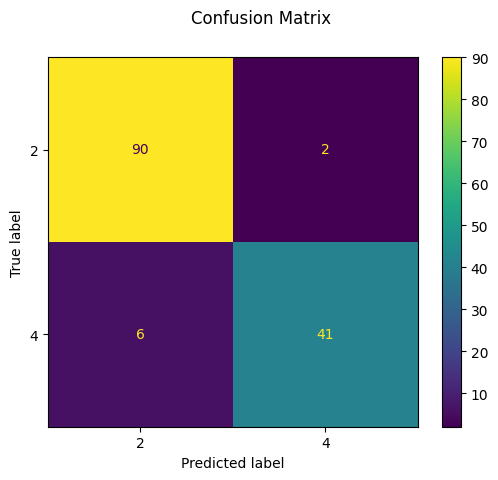

In [39]:
#Classification report
print(metrics.classification_report(y_test, predicted))

#ploting
confussion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

Let's try another popular choice: Radial Basis Function (RBF) kernels

In [40]:
model = svm.SVC(C=1,kernel='rbf',max_iter=5000, random_state=27)    # C = 1 means we are having some l2-regularization  penalty
model.fit(x_train, y_train)

SVC(C=1, max_iter=5000, random_state=27)

In [41]:
#Predict the response for test dataset
predicted = model.predict(x_test)

The ```Rbf``` kernel result is better than ```Poly``` kernel.

**Our F1-score is above 0.8**

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        92
           4       0.92      1.00      0.96        47

    accuracy                           0.97       139
   macro avg       0.96      0.98      0.97       139
weighted avg       0.97      0.97      0.97       139



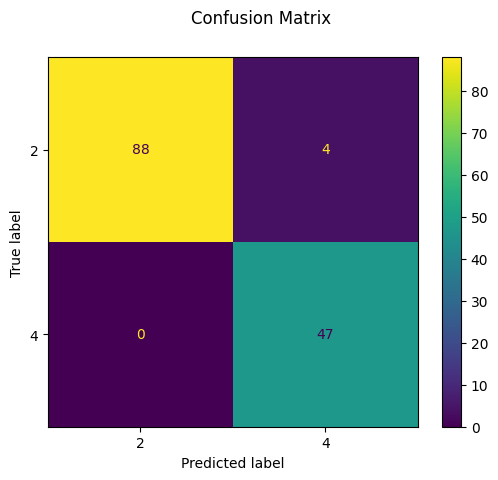

In [42]:
#Classification report
print(metrics.classification_report(y_test, predicted))

#ploting
confussion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

## KNN

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.

The value of k is very crucial in the KNN algorithm to define the number of neighbors in the algorithm. The value of k in the k-nearest neighbors (k-NN) algorithm should be chosen based on the input data. If the input data has more outliers or noise, a higher value of k would be better. It is recommended to choose an odd value for k to avoid ties in classification. Cross-validation methods can help in selecting the best k value for the given dataset.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier(weights='distance')

# Fit the model
knn.fit(x_train, y_train)

#prediction
predicted = knn.predict(x_test)

**Our F1-score is above 0.8**

              precision    recall  f1-score   support

           2       0.99      0.96      0.97        92
           4       0.92      0.98      0.95        47

    accuracy                           0.96       139
   macro avg       0.95      0.97      0.96       139
weighted avg       0.97      0.96      0.96       139



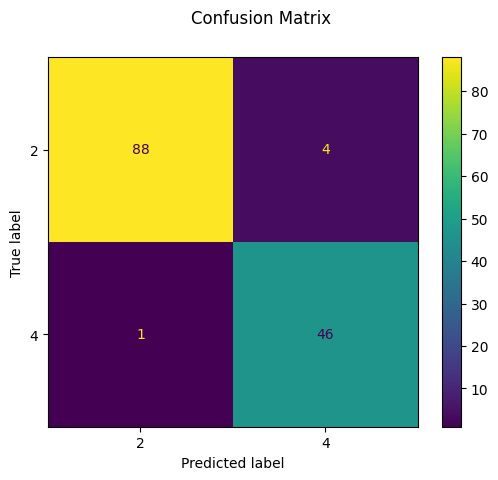

In [44]:
#Classification report
print(metrics.classification_report(y_test, predicted))

#ploting
confussion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Find the best parameter of n_neighbors**

The under plot shows that the result in 5 neighbors is better than other values

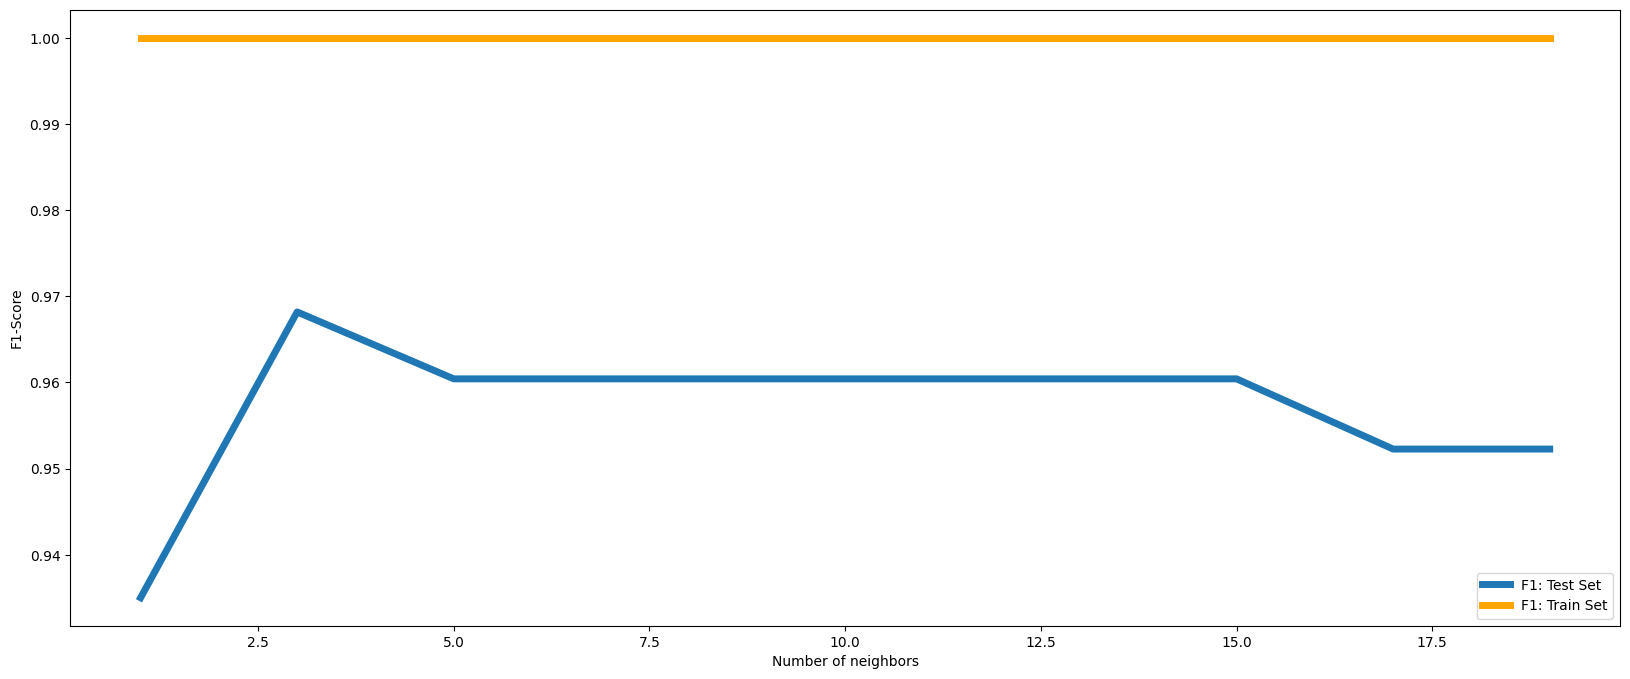

In [45]:
scores = []
neighbors_list = [1,3,5,7,9,15,17,19]
scores = []
scores_train = []
for n in neighbors_list:

    # Create the model
    model = KNeighborsClassifier(n_neighbors=n,weights='distance')
    model.fit(x_train, y_train)
    predictions_train = model.predict(x_train)
    F1_train = metrics.f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(x_test)
    F1 = metrics.f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(neighbors_list,scores,lw=5)
plt.plot(neighbors_list,scores_train,lw=5,color='orange')
plt.xlabel('Number of neighbors')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()

## Desicion Tree

A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks. It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. It is constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.

In [46]:
#Import tree models
from sklearn.tree import DecisionTreeClassifier 

#Create a decision tree Classifier
model = DecisionTreeClassifier(random_state=27) 

#Train the model using the training sets
model.fit(x_train, y_train)

#Predict the response for test dataset
predicted = model.predict(x_test)

              precision    recall  f1-score   support

           2       0.96      0.95      0.95        92
           4       0.90      0.91      0.91        47

    accuracy                           0.94       139
   macro avg       0.93      0.93      0.93       139
weighted avg       0.94      0.94      0.94       139



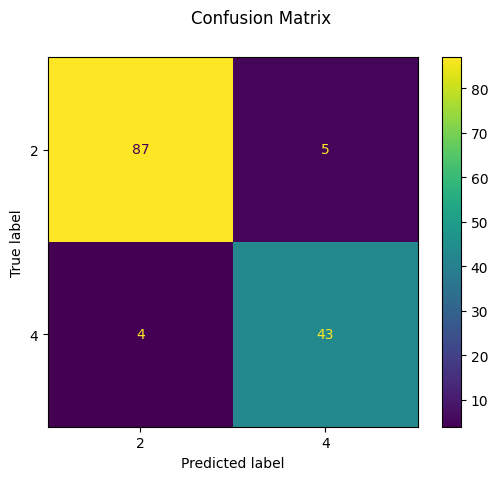

In [47]:
#Classification report
print(metrics.classification_report(y_test, predicted))

#ploting
confussion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Effect of Max-Depth (Accuracy vs. Overfitting)**

An important parameter that affects the performance of a decision tree is its maximum depth: setting too low will results in a not so accurate decision tree. On the other hand, if it is too high, the decision tree will overfit on the training set and perform poorly on the test set.

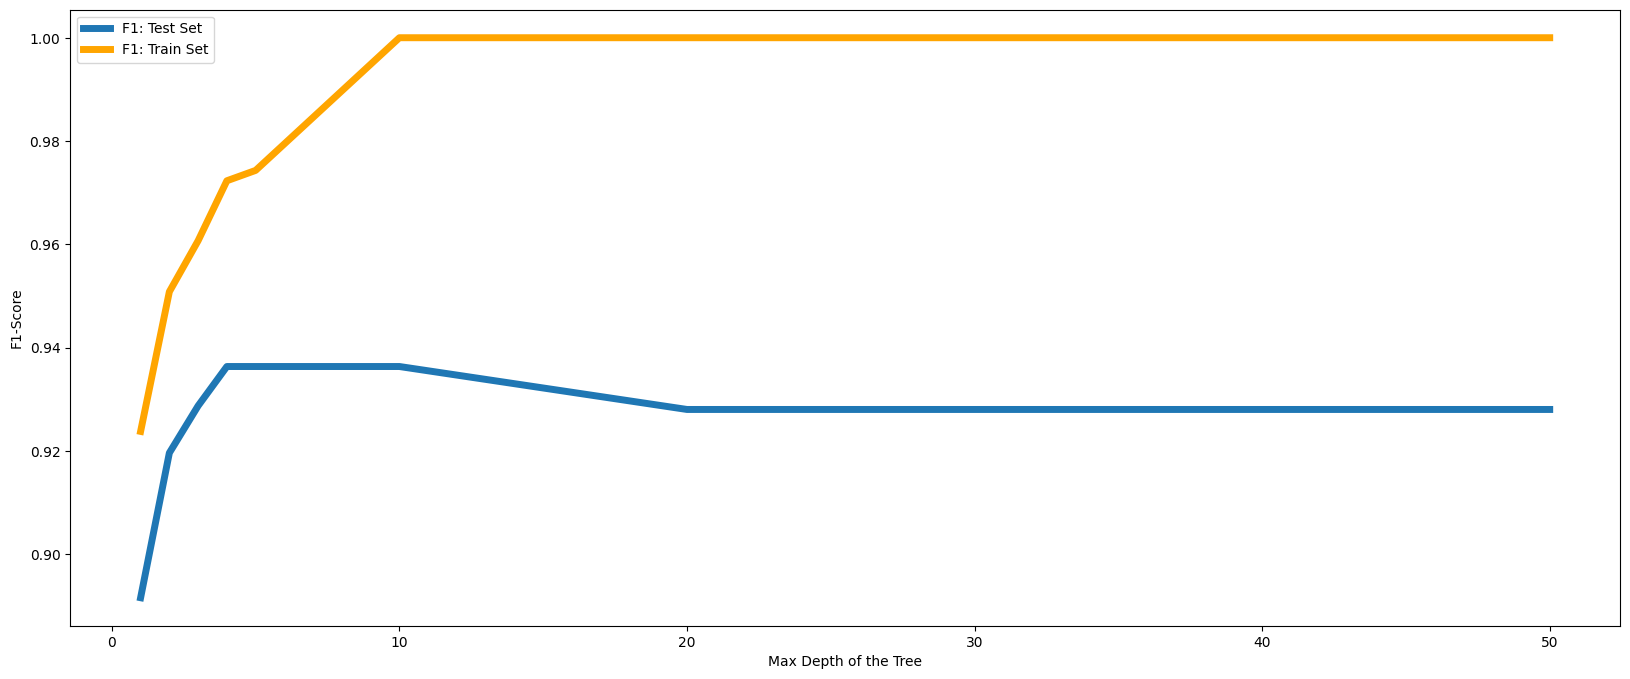

In [48]:
scores = []
depths_list = [1,2,3,4,5,10,20,30,40,50]
scores = []
scores_train = []
for depth in depths_list:

    # Create the model
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    predictions_train = model.predict(x_train)
    F1_train = metrics.f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(x_test)
    F1 = metrics.f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(depths_list,scores,lw=5)
plt.plot(depths_list,scores_train,lw=5,color='orange')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()

**Effect of max_features**

Similar to maximum depth, another parameter that affects the performance of a decision tree (both accuracy and computational complexity) is the number of features to consider when selecting a decision node. A very low amount results in low accuracy. A very large value could improve accuracy but might result in high computational complexity on large datasets.

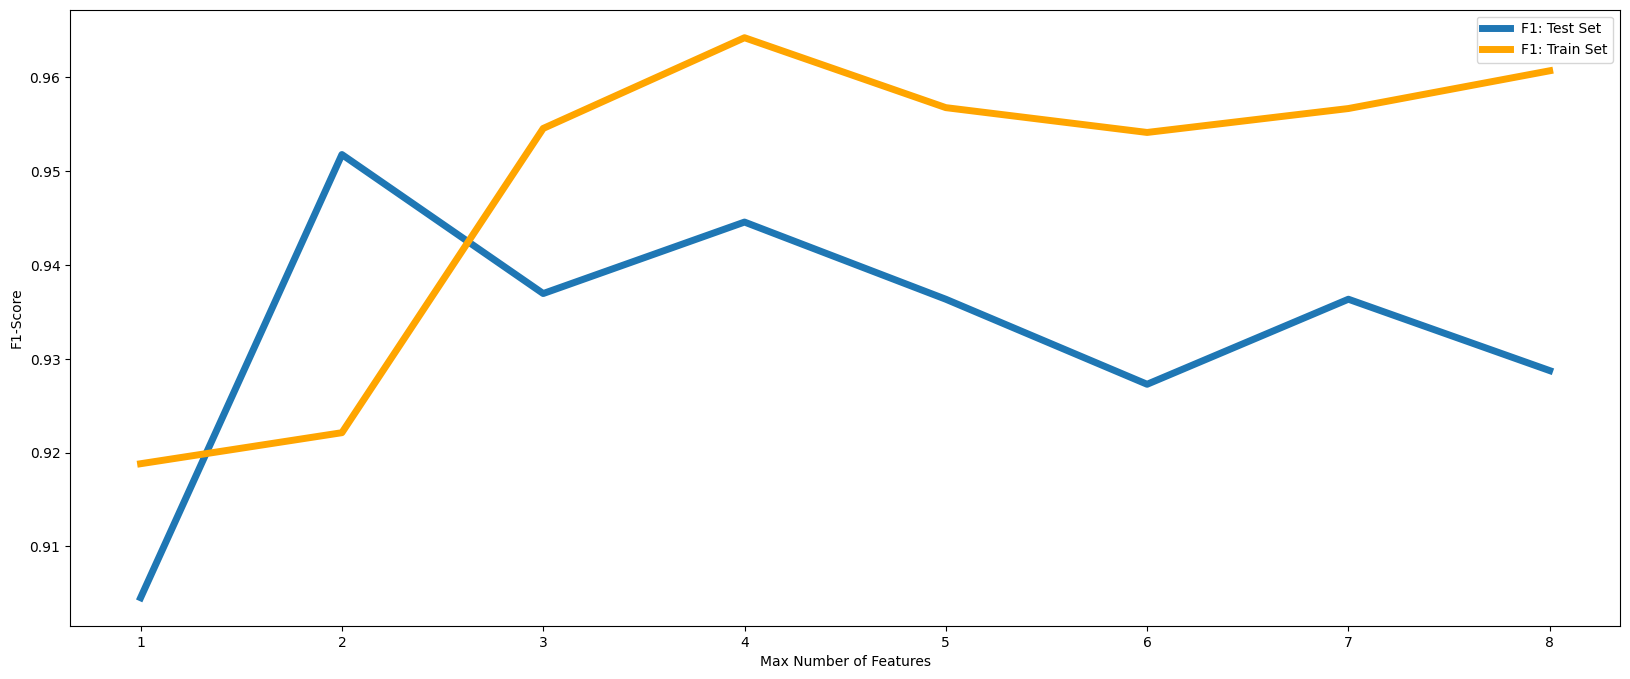

In [49]:
scores = []
features_list = [1,2,3,4,5,6,7,8]
scores = []
scores_train = []
for no_features in features_list:

    # Create the model
    model = DecisionTreeClassifier(max_features=no_features,max_depth=3)
    model.fit(x_train, y_train)
    predictions_train = model.predict(x_train)
    F1_train = metrics.f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(x_test)
    F1 = metrics.f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(features_list,scores,lw=5)
plt.plot(features_list,scores_train,lw=5,color='orange')
plt.xlabel('Max Number of Features')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()

**Now predict with best tunes**

In [50]:
max_of_features = 2
max_of_depth = 5

**Our F1-score is above than 0.8**

In [51]:
#Create a decision tree Classifier
model = DecisionTreeClassifier(max_features=max_of_features, max_depth=max_of_depth, random_state=27) 

#Train the model using the training sets
model.fit(x_train, y_train)

#Predict the response for test dataset
predicted = model.predict(x_test)

              precision    recall  f1-score   support

           2       0.97      0.96      0.96        92
           4       0.92      0.94      0.93        47

    accuracy                           0.95       139
   macro avg       0.94      0.95      0.94       139
weighted avg       0.95      0.95      0.95       139



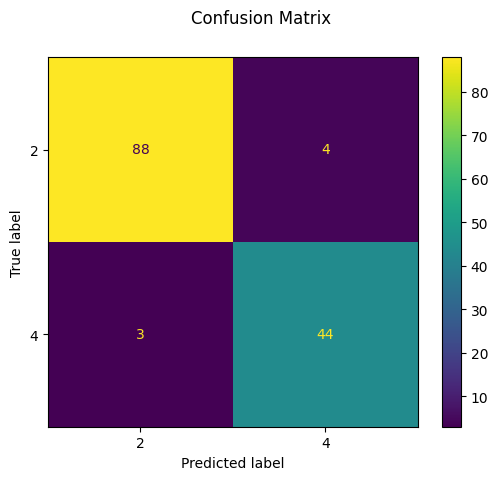

In [52]:
#Classification report
print(metrics.classification_report(y_test, predicted))

#ploting
confussion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Visualizing the Tree**

A very desirable properties of decision trees is that once they are trained, their decision mechanism, i.e. the acutal "decision tree", can be displayed and visualized very nicely. This will enable us to better understand what factors and criteria have contributed to the final decision made by the algorithm.

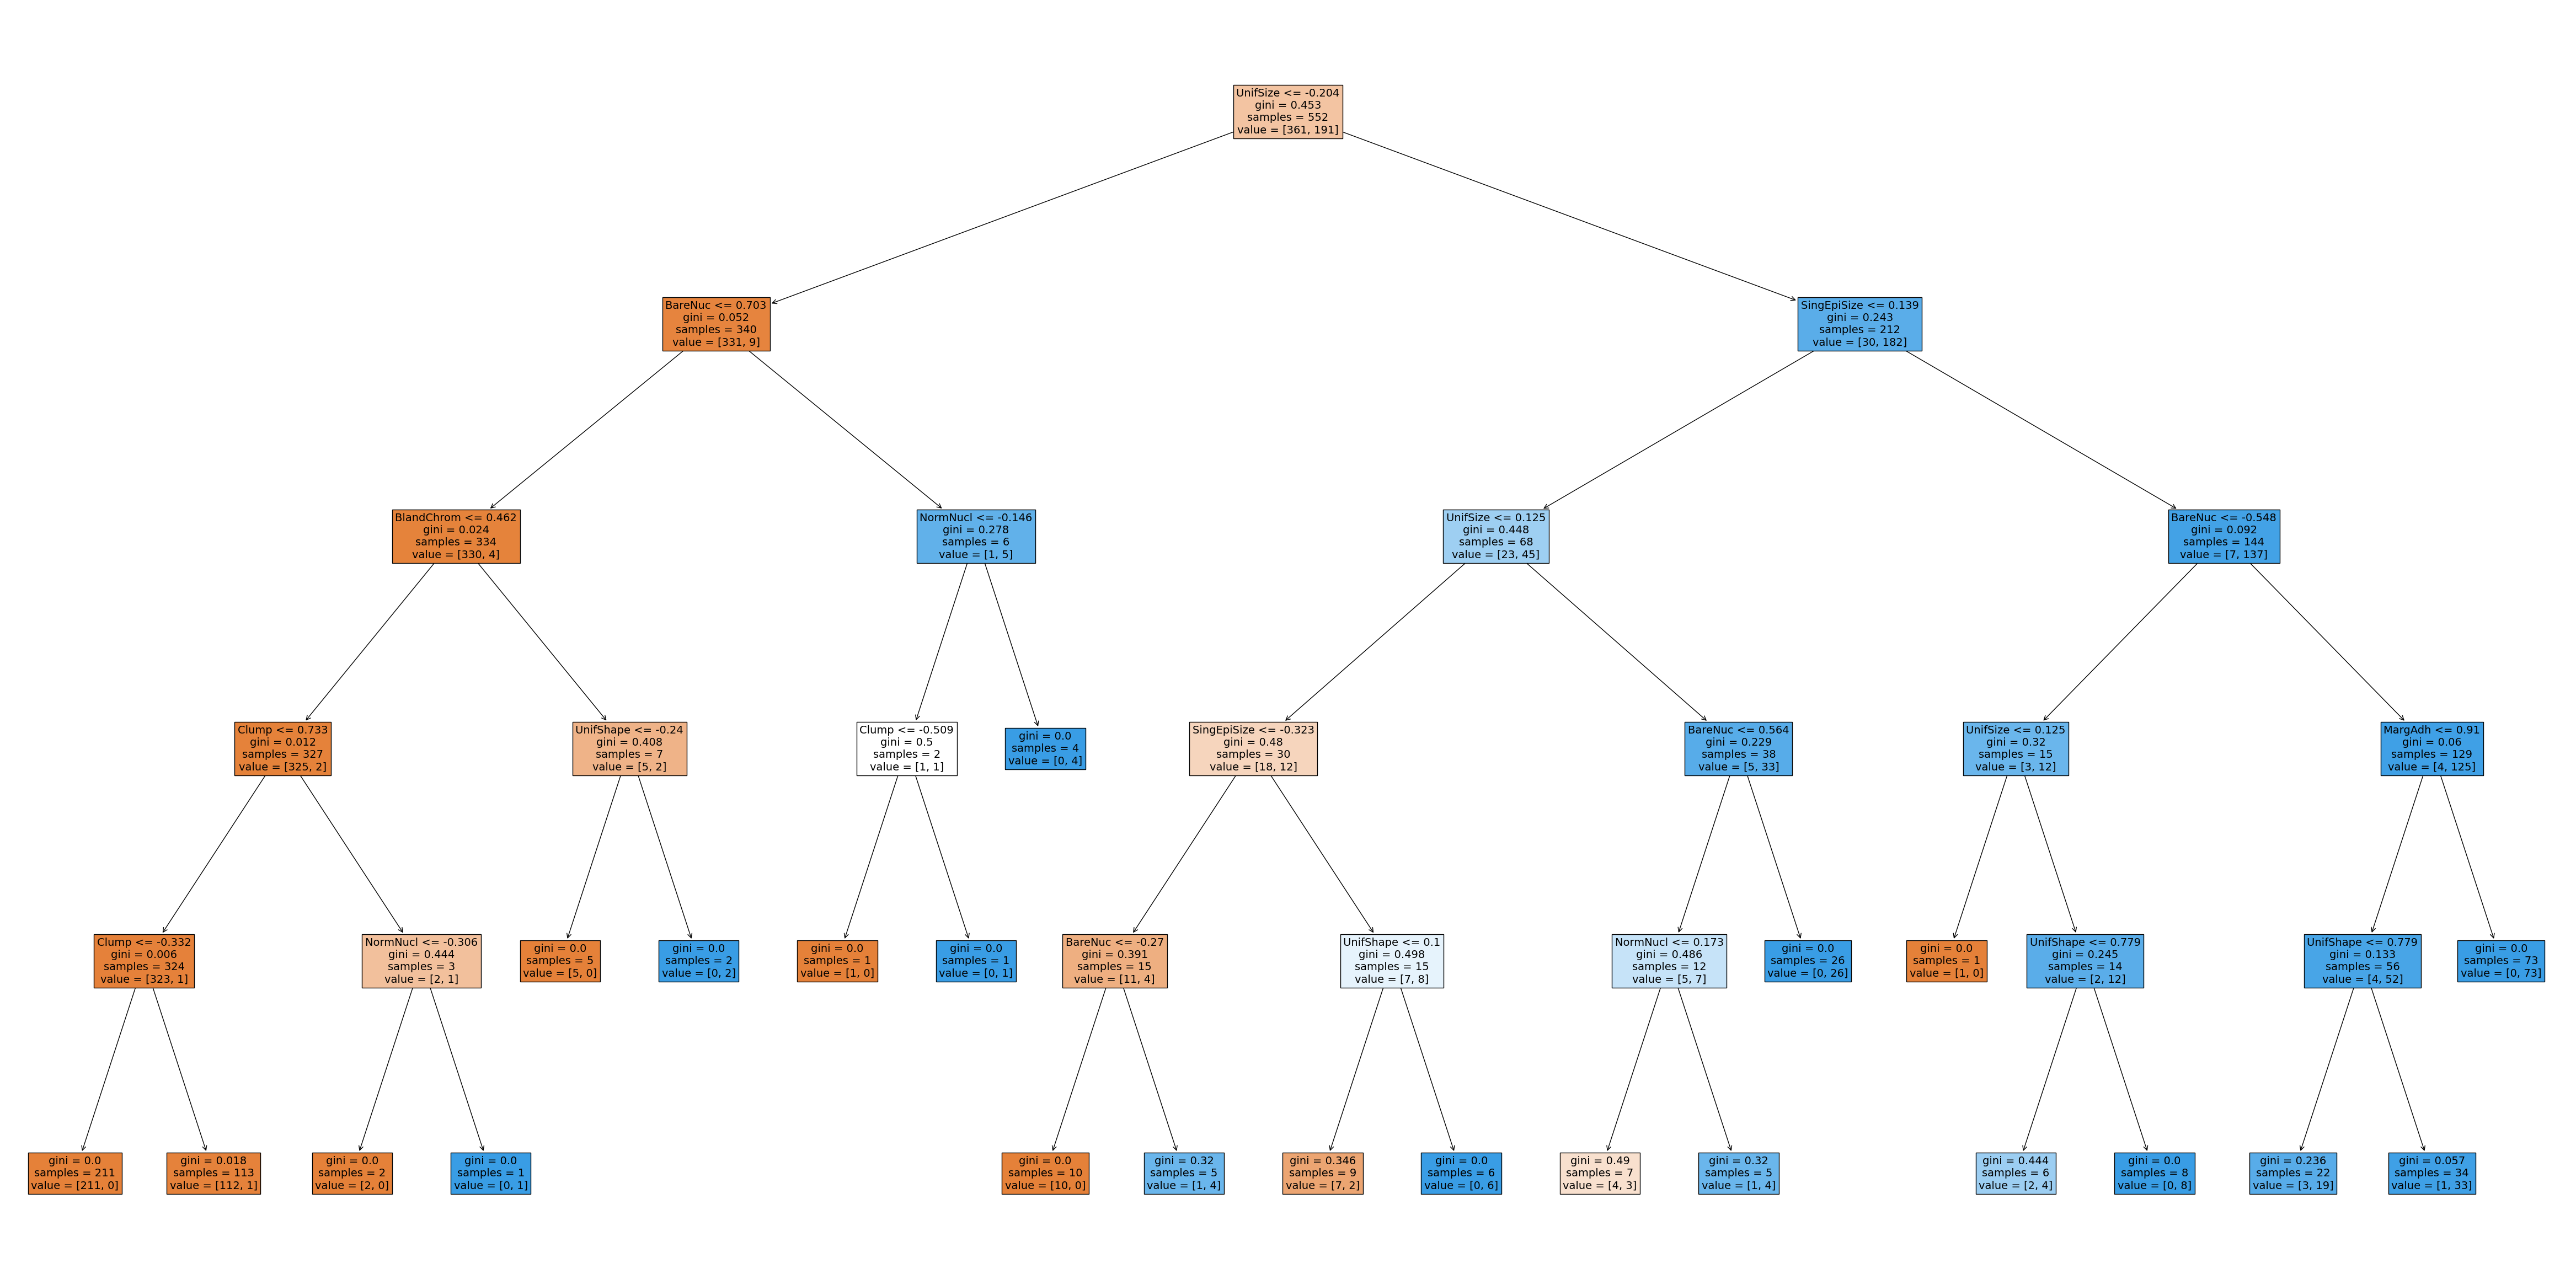

In [55]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (60,30))
tree.plot_tree(model,feature_names = df.columns, filled = True,fontsize=14);

## Random Forest

Random Forest Algorithm widespread popularity stems from its user-friendly nature and adaptability, enabling it to tackle both classification and regression problems effectively. The algorithm’s strength lies in its ability to handle complex datasets and mitigate overfitting, making it a valuable tool for various predictive tasks in machine learning.

In [56]:
from sklearn.ensemble import RandomForestClassifier

#Create a random forest Classifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=10,random_state=27)

#Train the model using the training sets
model.fit(x_train, y_train)

#Predict the response for test dataset
predicted = model.predict(x_test)

              precision    recall  f1-score   support

           2       0.99      0.96      0.97        92
           4       0.92      0.98      0.95        47

    accuracy                           0.96       139
   macro avg       0.95      0.97      0.96       139
weighted avg       0.97      0.96      0.96       139



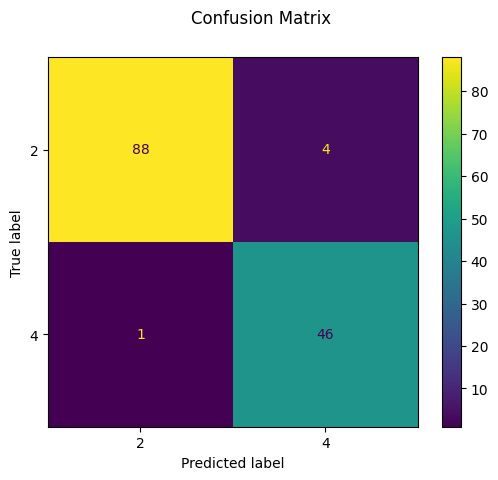

In [57]:
#Classification report
print(metrics.classification_report(y_test, predicted))

#ploting
confussion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Effect of n_estimators**

One of the most important parameters of the random forests is the number of decision trees we want to train. If this number (a.k.a. n_estimators) is 1, we are basically dealing with a single decision tree. A higher number should lead to better predictions. But it comes at a higher computational cost. So it is better to find a nice balance as usual:

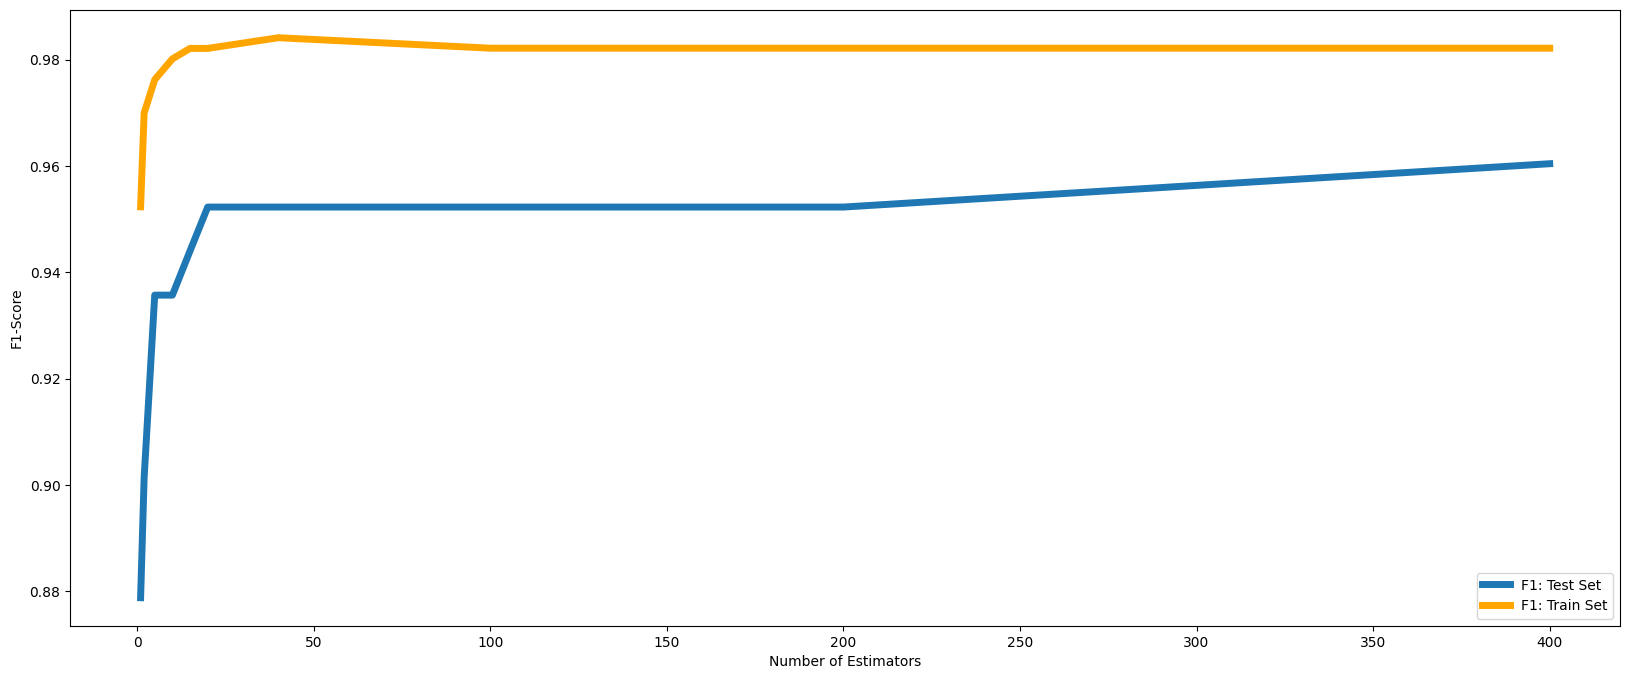

In [58]:
scores = []
no_estimators = [1,2,5,10,15,20,40,100,200,400]
scores = []
scores_train = []
for no_estimator in no_estimators:

    # Create the model
    model = RandomForestClassifier(n_estimators=no_estimator,max_depth=5,random_state=27)
    model.fit(x_train, y_train)
    predictions_train = model.predict(x_train)
    F1_train = metrics.f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(x_test)
    F1 = metrics.f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(no_estimators,scores,lw=5)
plt.plot(no_estimators,scores_train,lw=5,color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()

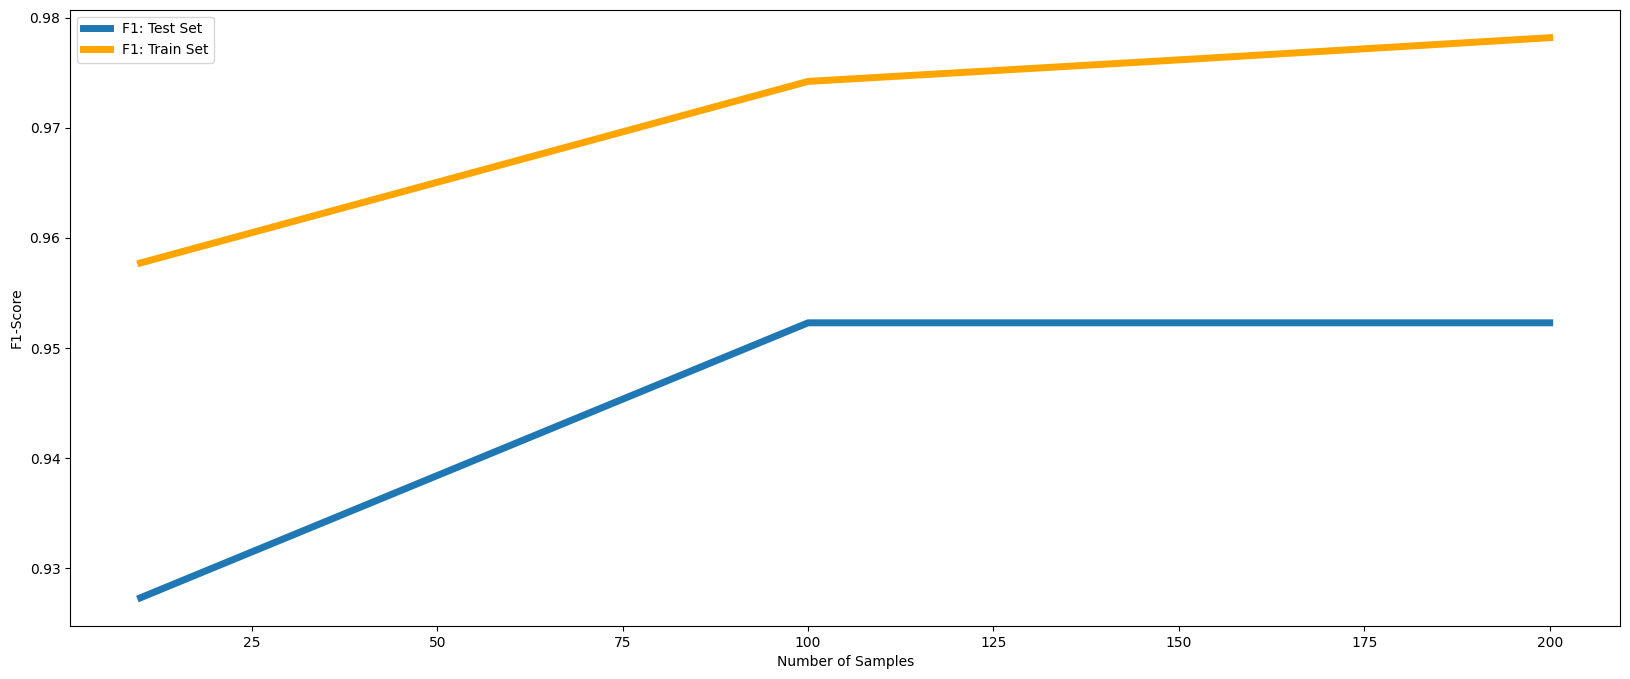

In [59]:
scores = []
max_samles_list = [10,100,150,200]
scores = []
scores_train = []
for max_samles in max_samles_list:

    # Create the model
    model = RandomForestClassifier(n_estimators=100,max_samples=max_samles,max_depth=5, random_state=27)
    model.fit(x_train, y_train)
    predictions_train = model.predict(x_train)
    F1_train = metrics.f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(x_test)
    F1 = metrics.f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(max_samles_list,scores,lw=5)
plt.plot(max_samles_list,scores_train,lw=5,color='orange')
plt.xlabel('Number of Samples')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()

<hr>

## Explain 3 techniques regualarize the training process for decision trees

**1 - Pruning**

- Pre-pruning:

Stop growing the tree before it becomes too complex. This can involve setting a maximum depth for the tree or requiring a minimum number of samples in a leaf node.

- Post-pruning :
 
Grow the tree fully and then prune it by removing nodes that do not provide significant predictive power. This can be based on measures like the Gini impurity or information gain.

**2 - Maximum Features**

Limit the number of features considered for a split. This can help prevent the model from becoming too tailored to the noise in the training data.

**3 - Maximum Depth**

Limit the depth of the tree. A shallow tree is less likely to overfit the training data.

**4 - Random Forest**

Similar to bagging but with an additional randomization element. Random forests train each tree on a random subset of features for each split, reducing correlation between trees and providing additional regularization.

<hr>